<a href="https://colab.research.google.com/github/elif-tr/Neural-Networks/blob/master/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Model Using Sequential API 

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

If you notice, we do not have validation set. Additionally, since we will traint the  model using neural network using  Gradient Descent, we must scale our input features.  We  will scale the  picture intesity to 0  - 1 range.

In [ ]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
#adding the list of classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#First Image in the training set
class_names[y_train[0]]

'Coat'

In [ ]:
#Classification MLP with two hidden layers
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [ ]:
#alternatively we can create the MLP as follows:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28,28]),
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


None Indicates that the bathc size can be anything! 

First hidden layer has 784 X 300 connection weights plus 300 bias terms. 

In [ ]:
#Get the models list of layers
model.layers

In [ ]:
#Fetch a layer by its index
hidden1 = model.layers[1]

In [ ]:
#Access the  paramaters of a layer including its weights and biases
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.01315162,  0.02596543, -0.01109169, ...,  0.04898356,
        -0.0063208 , -0.06915328],
       [-0.01718264,  0.05944559,  0.02990948, ...,  0.04220353,
         0.03941459,  0.06746058],
       [ 0.02825452,  0.06707378,  0.01859377, ...,  0.06291062,
        -0.00683049, -0.03104591],
       ...,
       [ 0.06734927, -0.00378102, -0.0488288 , ..., -0.00500021,
         0.04785345,  0.01858975],
       [-0.00959877,  0.05814962, -0.01339681, ..., -0.06297366,
        -0.02510071, -0.03382431],
       [ 0.0420434 , -0.06294916, -0.04600357, ..., -0.07435755,
         0.00308112, -0.0190167 ]], dtype=float32)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Since the shape of the weigth matrix depends on the number of inputs, it is 
important to specify the shape with inout_shape creating the first layer. However, if you do not know or forget the specify it,  it is okay as Keras will wait until it knows the input shape before building the model. This will happen when you feed the actual data or when you call the build() method. Until the model is built, the layers will not have any weights. 

# Compiling the model

After the model is created, you must call the compile() method to specify the loss function and the optimizer to use. 

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", 
             optimizer = 'sgd', 
             metrics=['accuracy'])



1.   We use sparse categorical cross entropy beacuse we have sparse labels from 0 to 9 and  the classes are exclusive.
2.   Optimizer will be Stochastic Gradeint Descent for backpropagation. And the default learning rate is 0.01. For manually setting the learning rate,  we will use  optimizer  = keras.optimizer.SGD(lr = whichever value we want it to be) rather than just typing optimizer = sgd.
3.   Since it is a classifier, we will use the accuracy metrix 



# Training and evaluating the model

In [ ]:
history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7173 - accuracy: 0.7634 - val_loss: 0.5094 - val_accuracy: 0.8312
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4859 - accuracy: 0.8317 - val_loss: 0.4494 - val_accuracy: 0.8420
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4394 - accuracy: 0.8476 - val_loss: 0.4212 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4124 - accuracy: 0.8557 - val_loss: 0.4004 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3914 - accuracy: 0.8627 - val_loss: 0.3832 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3761 - accuracy: 0.8685 - val_loss: 0.3810 - val_accuracy: 0.8698
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3617 - accuracy: 0.8722 - val_loss: 0.3578 - val_accuracy:

# Plotting the learning curve of our algorithm 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


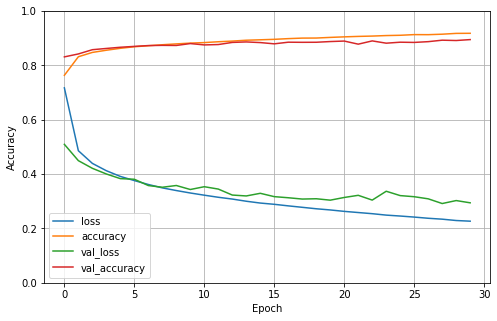

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,5)) #history.history contains the loss and extra metrics of the model
plt.grid(True)
plt.gca().set_ylim(0,1) #set the vertical range to [0-1]
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()



*   Lets evaluate the performance of our model



In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 66.9754 - accuracy: 0.8424


[66.97541809082031, 0.8424000144004822]

In [ ]:
y_test.shape

(10000,)

# Using the model to make predictions

In [ ]:
X_new = X_test[:3]

In [ ]:
y_prob = model.predict(X_new)

In [ ]:
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
y_pred

array([9, 2, 1])

In [ ]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]

In [ ]:
y_new

array([9, 2, 1], dtype=uint8)

We can see that the classifier actually classified all three images cprrectly. 